In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score




In [23]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
data.shape

(1599, 12)

In [26]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

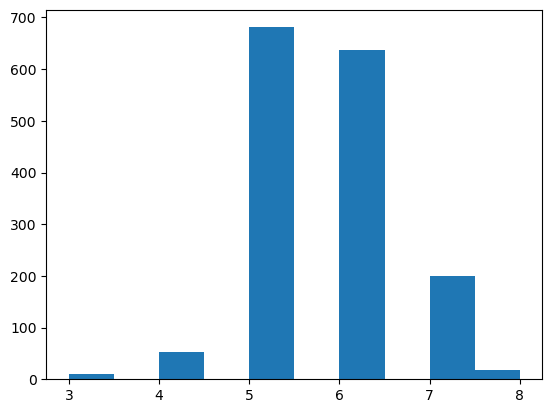

In [28]:
plt.hist(data.quality)



<Axes: xlabel='citric acid', ylabel='citric acid'>

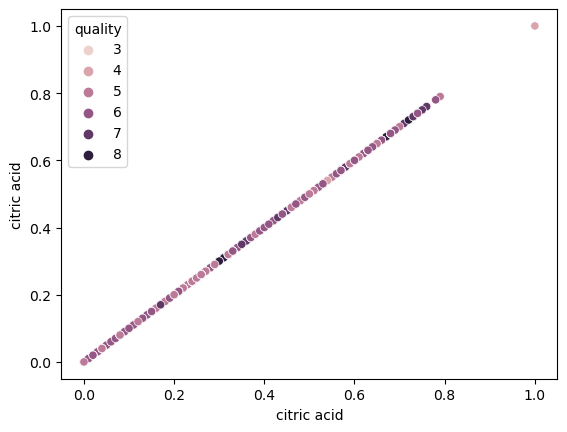

In [30]:
sns.scatterplot(x = "citric acid", y = "citric acid", hue = "quality", data = data)



In [33]:
predictors_col = ["quality", "quality", "residual sugar", "free sulfur dioxide"]
target_col = ['quality']



In [36]:
predictors = data[predictors_col]
target = data[target_col]

In [37]:
predictors

,quality,quality,residual sugar,free sulfur dioxide
0,5,5,1.9,11.0
1,5,5,2.6,25.0
2,5,5,2.3,15.0
3,6,6,1.9,17.0
4,5,5,1.9,11.0
...,...,...,...,...
1594,5,5,2.0,32.0
1595,6,6,2.2,39.0
1596,6,6,2.3,29.0
1597,5,5,2.0,32.0


In [38]:
target


,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [39]:
corr = predictors.corr()
corr

,quality,quality,residual sugar,free sulfur dioxide
quality,1.000000,1.000000,0.013732,-0.050656
quality,1.000000,1.000000,0.013732,-0.050656
residual sugar,0.013732,0.013732,1.000000,0.187049
free sulfur dioxide,-0.050656,-0.050656,0.187049,1.000000


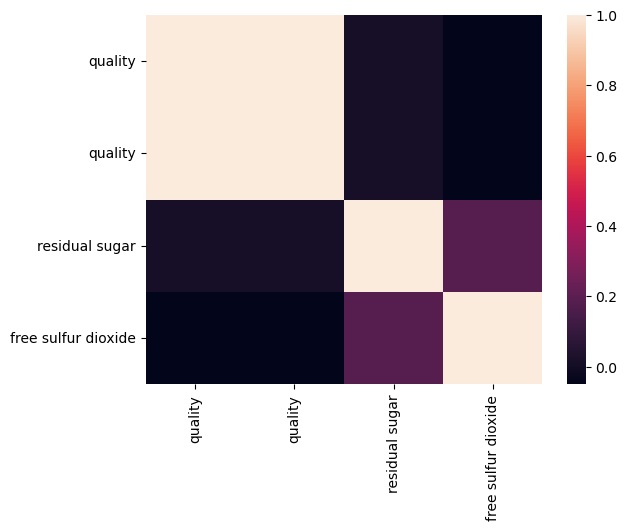

In [40]:
sns.heatmap(corr)
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [42]:
tree = DecisionTreeClassifier()

In [43]:
arbol = tree.fit(X_train, y_train)

[Text(0.5, 0.875, 'x[0] <= 5.5\ngini = 0.644\nsamples = 1199\nvalue = [8, 42, 500, 487, 150, 12]'),
 Text(0.3, 0.625, 'x[0] <= 4.5\ngini = 0.168\nsamples = 550\nvalue = [8, 42, 500, 0, 0, 0]'),
 Text(0.2, 0.375, 'x[1] <= 3.5\ngini = 0.269\nsamples = 50\nvalue = [8, 42, 0, 0, 0, 0]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0, 0, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0, 0, 0, 0]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 500\nvalue = [0, 0, 500, 0, 0, 0]'),
 Text(0.7, 0.625, 'x[0] <= 6.5\ngini = 0.383\nsamples = 649\nvalue = [0, 0, 0, 487, 150, 12]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 487\nvalue = [0, 0, 0, 487, 0, 0]'),
 Text(0.8, 0.375, 'x[1] <= 7.5\ngini = 0.137\nsamples = 162\nvalue = [0, 0, 0, 0, 150, 12]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 150\nvalue = [0, 0, 0, 0, 150, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 0, 0, 12]')]

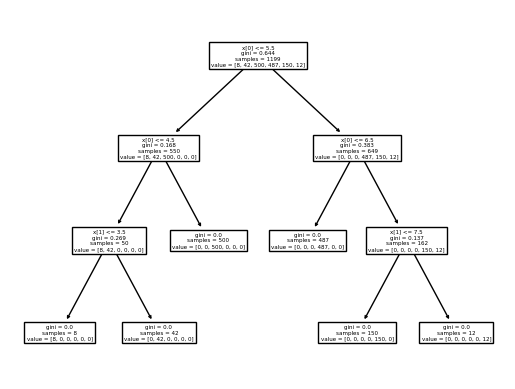

In [44]:
plot_tree(arbol)

In [45]:
predicciones = arbol.predict(X_test)

In [46]:
predicciones

array([6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 7, 8, 6, 7, 6, 5, 5, 5,
       6, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6,
       5, 5, 6, 7, 8, 6, 5, 6, 6, 5, 7, 6, 5, 7, 6, 5, 5, 5, 5, 5, 7, 7,
       5, 5, 5, 3, 6, 5, 7, 6, 6, 6, 6, 5, 5, 6, 8, 7, 5, 5, 6, 6, 6, 5,
       7, 6, 5, 6, 6, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 8, 5, 6, 5, 7,
       6, 6, 7, 6, 5, 6, 6, 7, 6, 6, 5, 4, 5, 7, 6, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 7, 5, 7, 5, 6, 6, 6, 6, 5, 7, 8, 4, 5, 4, 6, 6, 5, 6, 6, 5,
       5, 5, 5, 7, 6, 5, 6, 6, 6, 4, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 7, 5,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 4, 5, 5, 6, 5, 5, 6, 5, 6, 7,
       5, 5, 6, 6, 4, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6,
       5, 5, 6, 5, 5, 6, 5, 5, 4, 7, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6,
       7, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 7, 5, 7, 5, 5, 6, 7, 6, 5,
       6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 7, 5,
       6, 7, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,

In [48]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,2,0,0,0,0,0
4,0,11,0,0,0,0
5,0,0,181,0,0,0
6,0,0,0,151,0,0
7,0,0,0,0,49,0
8,0,0,0,0,0,6


In [49]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

1.0